In [73]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# Importing MNIST dataset from keras.datasets

from tensorflow.keras.datasets import mnist

In [28]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
single_image = x_train[0]
single_image.shape

(28, 28)

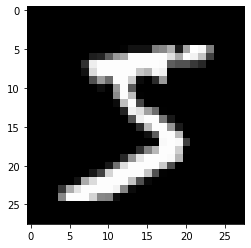

In [31]:
plt.set_cmap('gray')
plt.imshow(single_image)

In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
#Converting y_test and y_train to categorical values
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [34]:
# Normalizing training and test values

x_train = x_train / 255
x_test = x_test / 255

In [36]:
scaled_image = x_train[0]

In [37]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

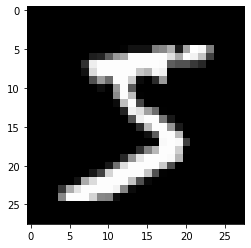

In [40]:
plt.imshow(scaled_image)

In [43]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
# Reshaping our training and test data with added color channels for CNN

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [49]:
# Importing libraries required for builling CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [50]:
# Create Model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Use Flatten to convert data to 1D Array
model.add(Flatten())

model.add(Dense(128, activation='relu'))

#Output Dense Layer - Activation Function Softmax for Multiclass Classification
model.add(Dense(10, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=1 )

In [58]:
model.fit(x_train, y_cat_train, 
          epochs=10, 
          validation_data=(x_test, y_cat_test), 
          callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.0425 - val_accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0439 - val_accuracy: 0.9853


In [60]:
#Model Evaluation
metrics = pd.DataFrame(model.history.history)

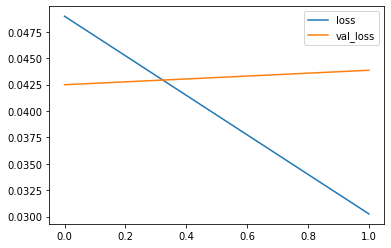

In [62]:
metrics[['loss','val_loss']].plot()

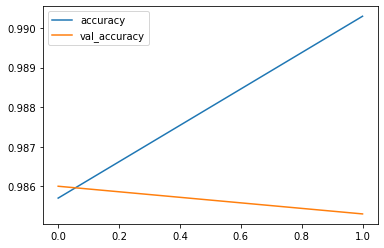

In [64]:
metrics[['accuracy', 'val_accuracy']].plot()

In [67]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.043854858726263046, 0.9853000044822693]

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.99      0.98      0.99       892
           6       0.97      0.99      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [72]:
confusion_matrix(y_test, predictions)

array([[ 970,    0,    1,    0,    0,    1,    7,    0,    0,    1],
       [   0, 1116,    0,    2,    0,    0,   11,    0,    6,    0],
       [   1,    1, 1014,    2,    0,    0,    3,    6,    5,    0],
       [   0,    0,    1, 1005,    0,    2,    0,    0,    2,    0],
       [   0,    0,    1,    0,  955,    0,    6,    0,    4,   16],
       [   1,    0,    0,    6,    0,  878,    4,    0,    2,    1],
       [   1,    1,    0,    0,    1,    1,  952,    0,    2,    0],
       [   1,    3,    3,    1,    0,    0,    0, 1009,    1,   10],
       [   3,    0,    1,    1,    0,    0,    2,    2,  963,    2],
       [   4,    1,    0,    1,    1,    5,    0,    3,    3,  991]],
      dtype=int64)

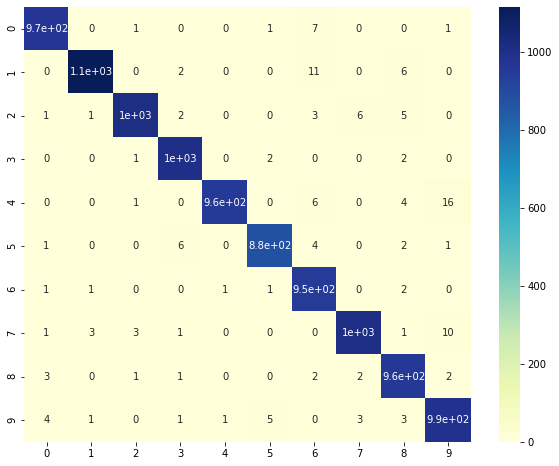

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='YlGnBu')

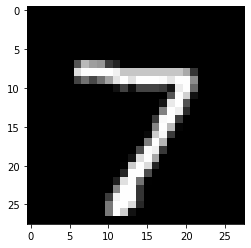

In [88]:
## Final Check
new_number = x_test[0]
plt.imshow(new_number.reshape(28,28))

In [89]:
new_number.shape

(28, 28, 1)

In [90]:
# shape shoule be of format (num_images, width, height, color_channel)
model.predict_classes(new_number.reshape(1, 28, 28, 1))

array([7], dtype=int64)